# Mini batch gradient descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

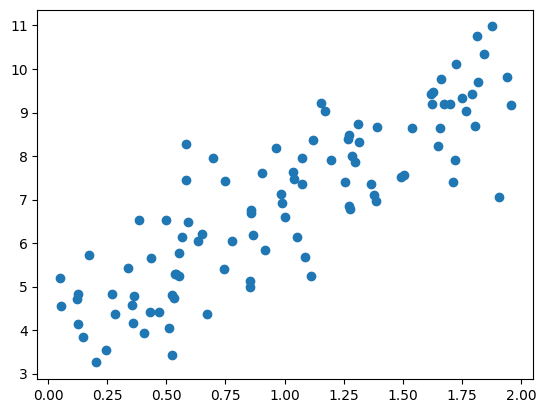

In [2]:
# X,y generates some linear sort of data. It can be visualized as two column dataset, in which X is the input and y is the output.
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X,y)
plt.show()

## Implementing Linear regression, just for cross-checking of our results

In [3]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
X_test = np.array([[0], [2]]) # sample data for testing
lin_reg.fit(X, y)
lin_reg.predict(X_test)


array([[3.94446037],
       [9.89927783]])

## Implementing mini batch gradient descent

In [4]:
t0 = 5
t1 = 50

def learning_schedule(t):
    return t0/(t+t1)
epochs = 50 # number of iterations
m = 100
theta = np.random.rand(2,1) # it will generate 2 random values in the given shape, i.e 2 rows and 1 cols for initialization purposes, we can take any value
theta

array([[0.53971521],
       [0.52246862]])

In [5]:
X_b = np.c_[np.ones((100, 1)), X]
batch_size = 10
n= m//batch_size

# updating values of weight randomly
for epoch in range(epochs):
    for i in range(0,m,n):
        random_index = np.random.randint(i,i+n) # will give any random value less than 100 (which is the number of rows)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
theta

array([[3.33337246],
       [3.50654818]])

In [6]:
X_test = np.c_[np.ones((2, 1)), X_test] # adding one's at each instance specifically for implementation. Refer notes to know the reason behind.
X_test

array([[1., 0.],
       [1., 2.]])

In [7]:
y_predict = X_test.dot(theta)
y_predict

array([[ 3.33337246],
       [10.34646883]])